##To run this notebook you need to upload the 'GDS_data3.csv' file which can be found on the github page

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM

##Function to load 'GDS_data3.csv' file

In [ ]:
def load_data():  
    return pd.read_csv('GDS_data3.csv') 

##Function to split the data into a training set and test set

In [ ]:
def tts(data):
    data = data.drop(['total','date'],axis=1)
    train, test = data[0:-80].values, data[-80:].values
    return train, test

##Function to find the mean_squared_error, mean_absolute_error, and r2_score of the prediction

In [ ]:
def get_scores(predictions, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.total[-80:], predictions))
    mae = mean_absolute_error(original_df.total[-80:], predictions)

    r2 = r2_score(original_df.total[-80:], predictions)
    model_scores[model_name] = [rmse, mae, r2]
 

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

##Function to plot the results

In [ ]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    x = np.linspace(0,240,240)

    
    plt.plot(x, original_df.total)
    plt.plot(x[-80:], results)
    ax.set(xlabel = "Sequence Number",
           ylabel = "Total",
           title = f"{model_name} Meals Forecasting Prediction")
    
    ax.legend()
    
    plt.savefig(f'{model_name}_forecast.png')

##Function that creates the model

In [ ]:
def lstm_model(train_data, test_data, data, model):
    x_train = train_data.reshape(train_data.shape[0], 1, train_data.shape[1])
    y_train = data['total'][:-80]
    
    
    x_test = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])
    y_test = data['total'][-80:]


    model.add(LSTM(50, batch_input_shape=(1, x_train.shape[1], x_train.shape[2]), 
                    stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=0, shuffle=False)
    predictions = model.predict(x_test,batch_size=1)


    get_scores(predictions, data, 'LSTM')
    

    plot_results(predictions[:,0], data, 'LSTM')

##Running the functions

No handles with labels found to put in legend.


RMSE: 78.28115659055426
MAE: 56.19960941672325
R2 Score: 0.9616323526913827


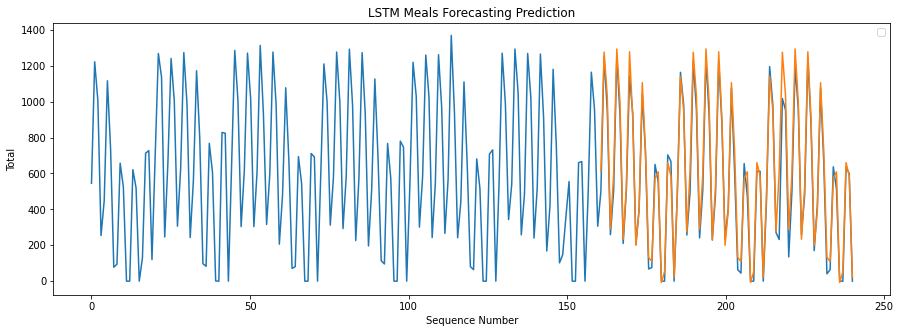

In [ ]:
data = load_data()
train, test = tts(data)
model = Sequential()
model_scores = {}

lstm_model(train, test, data, model)

##Defining days of the week

In [ ]:
def week_x_dict():
  d = {}
  d['Monday'] = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])
  d['Tuesday'] = np.array([[2, 1], [2, 2], [2, 3], [2, 4]])
  d['Wednesday'] = np.array([[3, 1], [3, 2], [3, 3], [3, 4]])
  d['Thursday'] = np.array([[4, 1], [4, 2], [4, 3], [4, 4]])
  d['Friday'] = np.array([[5, 1], [5, 2], [5, 3], [5, 4]])
  d['Saturday'] = np.array([[6, 1], [6, 2], [6, 3], [6, 4]])
  d['Sunday'] = np.array([[7, 1], [7, 2], [7, 3], [7, 4]])
  return d

##Defining predictions for each day

In [ ]:
def week_y_dict(d, model):
  d2 = {}
  for key in d:
    d2[key] = predict(d[key],model)
  
  return  d2

##Prediction function

In [ ]:
def predict(x_part,model):
  x_part = x_part.reshape(x_part.shape[0], 1, x_part.shape[1])
  predictions = model.predict(x_part,batch_size=1)
  #print(predictions)
  return predictions

##Plot the predictions

In [ ]:
def week_plot(d):
  i=1
  x_plot = [1,2,3,4]
  plt.figure(figsize=(16, 15)) 
  plt.suptitle('Week Predictions', fontsize = 16)
  for key in d:
    plt.subplot(3, 3, i)
    plt.bar(x_plot,d[key][:,0])
    plt.title(key, color = 'red')
    i+=1
    plt.ylabel("Meals")
    plt.xlabel("Meal Period")
  plt.show()
  plt.savefig('Day_forecast.png')

##Run the functions

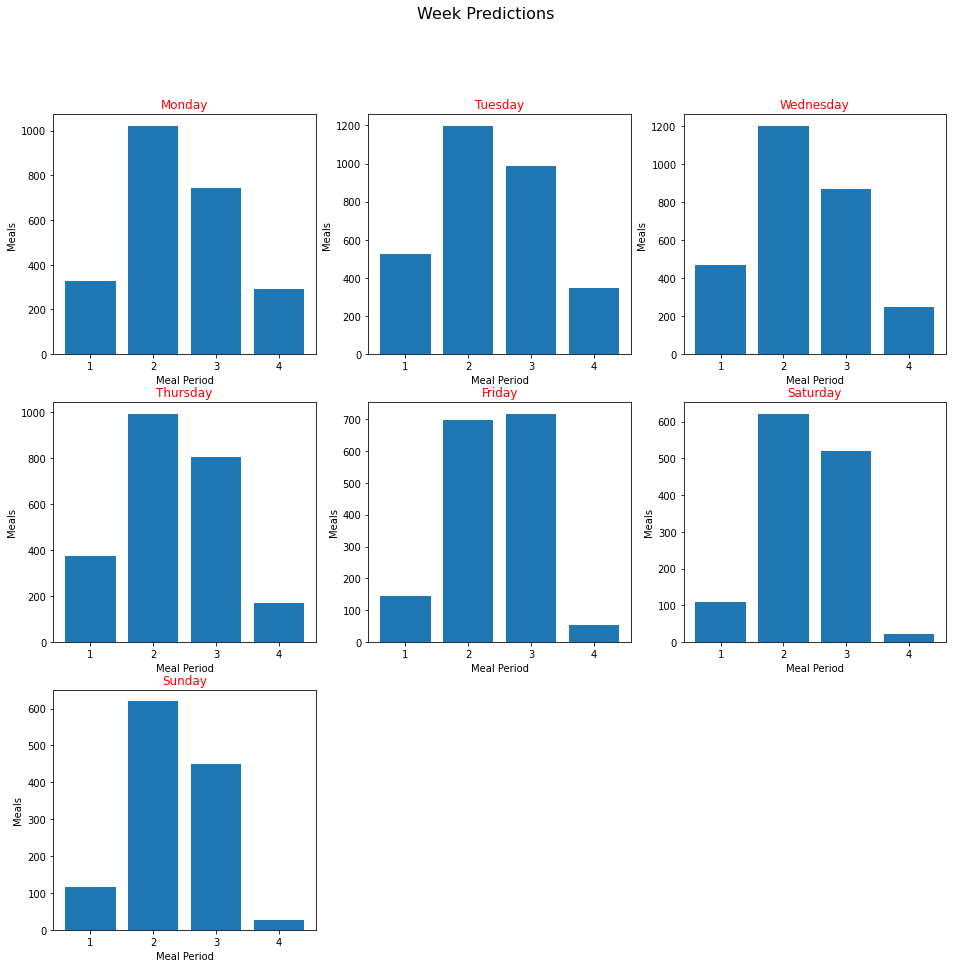

<Figure size 432x288 with 0 Axes>

In [ ]:
x_week = week_x_dict()
y_week = week_y_dict(x_week, model)
week_plot(y_week)